# Daten importieren


In [1]:
import pandas as pd

# Schritt 1: Lese die entsprechende Datei ein, speichere die Daten in der Variable 'df' ab und gib sie anschließend aus.
df = pd.read_csv("sleep_and_emotional_wellbeing_data.csv")
df

,hours_of_sleep,emotional_well_being
0,1.82,1.0
1,0.00,0.8
2,8.91,10.0
3,2.45,0.9
4,5.09,3.0
...,...,...
85,6.73,5.5
86,8.82,8.9
87,7.18,6.4
88,2.27,0.4


# Daten visualisieren

<Axes: xlabel='hours_of_sleep', ylabel='emotional_well_being'>

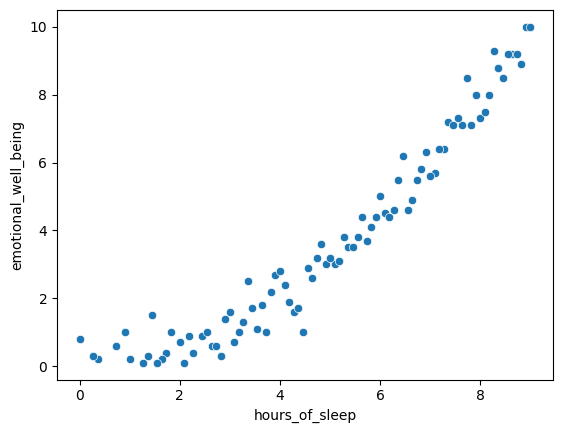

In [2]:
import seaborn as sns

# Schritt 2: Visualisiere die Daten mithilfe eines Scatterplots.
sns.scatterplot(x=df["hours_of_sleep"], y=df["emotional_well_being"])

# Daten aufteilen

In [3]:
# Schritt 3: Weise das entsprechende Feature der Eingabevariable X und das zugehörige Ziel der Zielvariable y zu.

X = df[["hours_of_sleep"]]
y = df["emotional_well_being"]

In [4]:
X

,hours_of_sleep
0,1.82
1,0.00
2,8.91
3,2.45
4,5.09
...,...
85,6.73
86,8.82
87,7.18
88,2.27


In [5]:
y

0      1.0
1      0.8
2     10.0
3      0.9
4      3.0
      ... 
85     5.5
86     8.9
87     6.4
88     0.4
89     3.8
Name: emotional_well_being, Length: 90, dtype: float64

# Polynomiale Features erstellen

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Schritt 4: Erstelle die nötigen polynomialen Features.
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly

array([[1.82000e+00, 3.31240e+00],
       [0.00000e+00, 0.00000e+00],
       [8.91000e+00, 7.93881e+01],
       [2.45000e+00, 6.00250e+00],
       [5.09000e+00, 2.59081e+01],
       [7.09000e+00, 5.02681e+01],
       [7.36000e+00, 5.41696e+01],
       [4.09000e+00, 1.67281e+01],
       [4.64000e+00, 2.15296e+01],
       [8.64000e+00, 7.46496e+01],
       [7.73000e+00, 5.97529e+01],
       [8.00000e+00, 6.40000e+01],
       [4.91000e+00, 2.41081e+01],
       [3.64000e+00, 1.32496e+01],
       [3.55000e+00, 1.26025e+01],
       [4.82000e+00, 2.32324e+01],
       [4.18000e+00, 1.74724e+01],
       [5.36000e+00, 2.87296e+01],
       [7.91000e+00, 6.25681e+01],
       [7.45000e+00, 5.55025e+01],
       [5.64000e+00, 3.18096e+01],
       [7.00000e+00, 4.90000e+01],
       [3.45000e+00, 1.19025e+01],
       [5.73000e+00, 3.28329e+01],
       [3.91000e+00, 1.52881e+01],
       [6.36000e+00, 4.04496e+01],
       [1.45000e+00, 2.10250e+00],
       [8.09000e+00, 6.54481e+01],
       [5.18000e+00,

In [8]:
from sklearn.model_selection import train_test_split

#Schritt 5: Unterteile die Daten in Trainings- und Testdaten, wobei die Testdaten 20% der Gesamtdaten ausmachen sollten.
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [9]:
X_train

array([[2.18000e+00, 4.75240e+00],
       [3.09000e+00, 9.54810e+00],
       [3.45000e+00, 1.19025e+01],
       [7.36000e+00, 5.41696e+01],
       [3.18000e+00, 1.01124e+01],
       [3.27000e+00, 1.06929e+01],
       [6.00000e+00, 3.60000e+01],
       [7.64000e+00, 5.83696e+01],
       [4.27000e+00, 1.82329e+01],
       [6.82000e+00, 4.65124e+01],
       [2.70000e-01, 7.29000e-02],
       [2.45000e+00, 6.00250e+00],
       [2.64000e+00, 6.96960e+00],
       [4.36000e+00, 1.90096e+01],
       [8.09000e+00, 6.54481e+01],
       [7.91000e+00, 6.25681e+01],
       [3.36000e+00, 1.12896e+01],
       [6.09000e+00, 3.70881e+01],
       [4.45000e+00, 1.98025e+01],
       [5.00000e+00, 2.50000e+01],
       [5.91000e+00, 3.49281e+01],
       [5.09000e+00, 2.59081e+01],
       [4.82000e+00, 2.32324e+01],
       [5.36000e+00, 2.87296e+01],
       [1.36000e+00, 1.84960e+00],
       [4.00000e+00, 1.60000e+01],
       [7.09000e+00, 5.02681e+01],
       [2.82000e+00, 7.95240e+00],
       [6.55000e+00,

In [10]:
y_train

77     0.9
42     0.7
22     1.7
6      7.2
61     1.0
      ... 
86     8.9
67    10.0
64     0.1
47     2.9
44     6.2
Name: emotional_well_being, Length: 72, dtype: float64

# Modell trainieren

In [11]:
from sklearn.linear_model import LinearRegression

# Schritt 6: Erstelle eine Instanz eines linearen Regressionsmodells und trainiere dieses Modell auf den Trainingsdaten.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Modell visualisieren

Text(0.5, 0, 'hours_of_sleep')

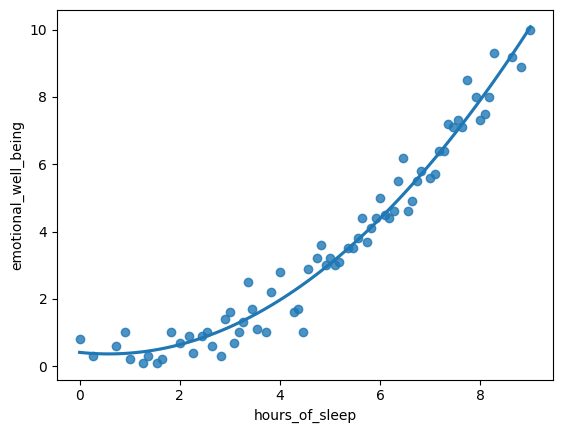

In [12]:
import matplotlib.pyplot as plt

# Schritt 7: Visualisiere das Modell.
sns.regplot(x=X_train[:, 0], y=y_train, order=2, ci=None)
plt.xlabel("hours_of_sleep")

# Vorhersage

In [13]:
# Schritt 8: Nutze das trainierte Modell, um Vorhersagen für die Testdaten zu generieren.

y_predict = model.predict(X_test)

# Modellbewertung (Mean Absolute Error)

In [14]:
from sklearn.metrics import mean_absolute_error

# Schritt 9: Berechne den Mean Absolute Error (MAE) basierend auf den Vorhersagen und den Testdaten und vervollständige die 'print()'-Funktion.
mae = mean_absolute_error(y_predict, y_test)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.34597117660760457


# Modellparameter

In [15]:
# Schritt 10: Extrahiere die Parameter m_1, m_2 und c und vervollständige die 'print()'-Funktion.

m_1, m_2 = model.coef_
c = model.intercept_

print(f"m1: {m_1}, m2: {m_2}, c: {c}")

m1: -0.15891981179083225, m2: 0.13710573005075505, c: 0.4094576796747078
